<a href="https://colab.research.google.com/github/BernasconiLorenzo06/Geopandas/blob/main/GeoPandas2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 17.9 MB/s 
     |████████████████████████████████| 16.6 MB 67.0 MB/s 
     |████████████████████████████████| 7.8 MB 57.9 MB/s 


In [3]:
%matplotlib inline
import pandas as pd
import geopandas

In [4]:
#legga i diversi file 
countries = geopandas.read_file("https://github.com/jorisvandenbossche/geopandas-tutorial/blob/main/data/ne_110m_admin_0_countries.zip?raw=true")
cities = geopandas.read_file("https://github.com/jorisvandenbossche/geopandas-tutorial/blob/main/data/ne_110m_populated_places.zip?raw=true")
rivers = geopandas.read_file("https://github.com/jorisvandenbossche/geopandas-tutorial/blob/main/data/ne_50m_rivers_lake_centerlines.zip?raw=true")

In [5]:
#Un GeoDataFrame o GeoSeries ha un (.crs) attributo che contiene (facoltativamente) una descrizione del sistema di riferimento delle coordinate delle geometrie:

In [6]:
countries.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

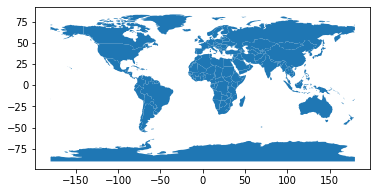

In [7]:
#crea la cartine di tutti i countries
countries.plot()

In [8]:
#visualizza tutti gli stati che sono dicìversida antartica
countries = countries[(countries['name'] != "Antarctica")]
countries

,iso_a3,name,continent,pop_est,gdp_md_est,geometry
0,AFG,Afghanistan,Asia,34124811.0,64080.0,"POLYGON ((61.21082 35.65007, 62.23065 35.27066..."
1,AGO,Angola,Africa,29310273.0,189000.0,"MULTIPOLYGON (((23.90415 -11.72228, 24.07991 -..."
2,ALB,Albania,Europe,3047987.0,33900.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58000..."
3,ARE,United Arab Emirates,Asia,6072475.0,667200.0,"POLYGON ((51.57952 24.24550, 51.75744 24.29407..."
4,ARG,Argentina,South America,44293293.0,879400.0,"MULTIPOLYGON (((-66.95992 -54.89681, -67.56244..."
...,...,...,...,...,...,...
172,VUT,Vanuatu,Oceania,282814.0,723.0,"MULTIPOLYGON (((167.84488 -16.46633, 167.51518..."
173,YEM,Yemen,Asia,28036829.0,73450.0,"POLYGON ((52.00001 19.00000, 52.78218 17.34974..."
174,ZAF,South Africa,Africa,54841552.0,739100.0,"POLYGON ((19.89577 -24.76779, 20.16573 -24.917..."
175,ZMB,Zambia,Africa,15972000.0,65170.0,"POLYGON ((23.21505 -17.52312, 22.56248 -16.898..."


In [9]:
countries_mercator = countries.to_crs(epsg=3395)
countries_mercator

,iso_a3,name,continent,pop_est,gdp_md_est,geometry
0,AFG,Afghanistan,Asia,34124811.0,64080.0,"POLYGON ((6813956.990 4227673.562, 6927484.435..."
1,AGO,Angola,Africa,29310273.0,189000.0,"MULTIPOLYGON (((2660998.216 -1305442.810, 2680..."
2,ALB,Albania,Europe,3047987.0,33900.0,"POLYGON ((2339940.185 4961221.199, 2337708.178..."
3,ARE,United Arab Emirates,Asia,6072475.0,667200.0,"POLYGON ((5741805.754 2765811.385, 5761611.935..."
4,ARG,Argentina,South America,44293293.0,879400.0,"MULTIPOLYGON (((-7453944.198 -7306880.704, -75..."
...,...,...,...,...,...,...
172,VUT,Vanuatu,Oceania,282814.0,723.0,"MULTIPOLYGON (((18684406.211 -1846685.560, 186..."
173,YEM,Yemen,Asia,28036829.0,73450.0,"POLYGON ((5788614.612 2141032.017, 5875685.877..."
174,ZAF,South Africa,Africa,54841552.0,739100.0,"POLYGON ((2214786.747 -2829354.878, 2244838.29..."
175,ZMB,Zambia,Africa,15972000.0,65170.0,"POLYGON ((2584287.373 -1968946.360, 2511643.61..."


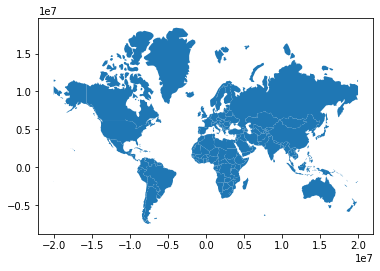

In [10]:
countries_mercator.plot()

#ESERCIZI

**esercizio 1**

- Leggere i set di dati dei distretti ("data/paris_districts.geojson") in un GeoDataFrame chiamato districts.
- Guarda l'attributo CRS del GeoDataFrame. Riconosci il numero EPSG?
Crea un grafico del set di dati dei distretti.
- Calcola l'area di tutti i distretti.
- Convertire i distretti in un CRS proiettato (utilizzando l'EPSG:2154 per la Francia). Chiama il nuovo set di dati districts_RGF93.
- Crea una trama simile di districts_RGF93.
- Calcolare nuovamente l'area di tutti i quartieri con districts_RGF93 (il risultato sarà ora espresso in m²).
suggerimenti
Le informazioni CRS vengono archiviate nell'attributo .crs di un GeoDataFrame.
- Creare un semplice grafico di un GeoDataFrame può essere fatto con il metodo .plot().
- La conversione in un SR diverso può essere eseguita con il metodo .to_crs() e il SR può essere specificato come numero EPSG utilizzando la parola chiave epsg.

In [19]:
districts = geopandas.read_file("https://raw.githubusercontent.com/jorisvandenbossche/geopandas-tutorial/main/data/paris_districts.geojson")

In [ ]:
districts.crs

In [ ]:
districts.head()

In [ ]:
districts.plot()

In [ ]:
districts.geometry.area

In [16]:
districts_RGF93 = districts.to_crs(epsg=2154)

In [ ]:
districts_RGF93.plot()

In [ ]:
districts_RGF93.geometry.area

**esercizio 2**

- Leggi i set di dati delle stazioni per biciclette ("data/paris_bike_stations.geojson") in un GeoDataFrame chiamato stazioni.
- Convertire il set di dati delle stazioni nella proiezione Web Mercator (EPSG:3857). Chiama il risultato stazioni_webmercator e ispeziona il risultato.
- Crea un grafico di questo set di dati proiettato (specifica la dimensione del marcatore su 5) e aggiungi una mappa di sfondo usando contestualmente.
Suggerimenti
- Creare un semplice grafico di un GeoDataFrame può essere fatto con il metodo .plot(). Questo restituisce un oggetto assi matplotlib.
- La dimensione del marcatore può essere specificata con la parola chiave markersize se il metodo .plot().
- Per aggiungere una mappa di sfondo, usa la funzione contextily.add_basemap(). Prende l'ascia matplotlib a cui aggiungere una mappa come primo argomento.

In [ ]:
stations = geopandas.read_file("https://raw.githubusercontent.com/jorisvandenbossche/geopandas-tutorial/main/data/paris_bike_stations.geojson")
stations.head()

In [ ]:
stations_webmercator = stations.to_crs("EPSG:3857")
stations.head()